# Análisis exploratorio (EDA)

### Setup

In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

df = pd.read_csv('data/StudentsPerformance.csv')

## Entendimiento de los datos

In [481]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [482]:
# Analizamos la estructura de nuestro data frame, para ver si contiene valores nulos, los tipos de objetos y las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [483]:
# Obtenemos un análisis estadístico de los datos numéricos de nuestro data frame

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [484]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [485]:
df.value_counts('gender').reset_index(name= 'count')

,gender,count
0,female,518
1,male,482


In [486]:
df.value_counts('race_ethnicity').reset_index(name= 'count')

,race_ethnicity,count
0,group C,319
1,group D,262
2,group B,190
3,group E,140
4,group A,89


## Limpieza de los datos

* Drop de columnas y filas irrelevantes
* Identificar columnas duplicadas
* Renombrar valores de columnas

In [487]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Cambiando los valores y nombres a unos mas cómodos

In [488]:
df = df.rename(columns={
                        'race_ethnicity': 'ethnicity',
                        'parental_level_of_education': 'parent_education',
                        'test_preparation_course': 'preparation'
                        })

In [489]:
df = (
    df
    .assign(
        ethnicity = lambda df: df.ethnicity.replace(
            ['group A', 'group B', 'group C', 'group D', 'group E'],
            ['A', 'B', 'C', 'D', 'E']
        )
    )
)

### Verificando valores nulos

In [490]:
df.isnull().sum().reset_index()

,index,0
0,gender,0
1,ethnicity,0
2,parent_education,0
3,lunch,0
4,preparation,0
5,math_score,0
6,reading_score,0
7,writing_score,0


In [491]:
pd.isna(df).sum().reset_index(name= 'count')

,index,count
0,gender,0
1,ethnicity,0
2,parent_education,0
3,lunch,0
4,preparation,0
5,math_score,0
6,reading_score,0
7,writing_score,0


### Verificando duplicados

In [492]:
df.loc[df.duplicated()]

# No es necesario analizar duplicados por columna ya que por la naturaleza del data set, se permiten registros duplicados en las columnas

,gender,ethnicity,parent_education,lunch,preparation,math_score,reading_score,writing_score


### Conclusiones del proceso de limpieza

* Se cambio el nombre de algunas columnas para una mejor manipulacion de estas

* Se verificó que no existieran valores duplicados

* Se verificó que no existieran valores nulos

* Se verificó que no existieran valores numéricos NaN

# Análisis univariado

* Graficas de las distribuciones
    * Histogramas
    * KDE
    * Boxplot

In [493]:
df.head()

,gender,ethnicity,parent_education,lunch,preparation,math_score,reading_score,writing_score
0,female,B,bachelor's degree,standard,none,72,72,74
1,female,C,some college,standard,completed,69,90,88
2,female,B,master's degree,standard,none,90,95,93
3,male,A,associate's degree,free/reduced,none,47,57,44
4,male,C,some college,standard,none,76,78,75


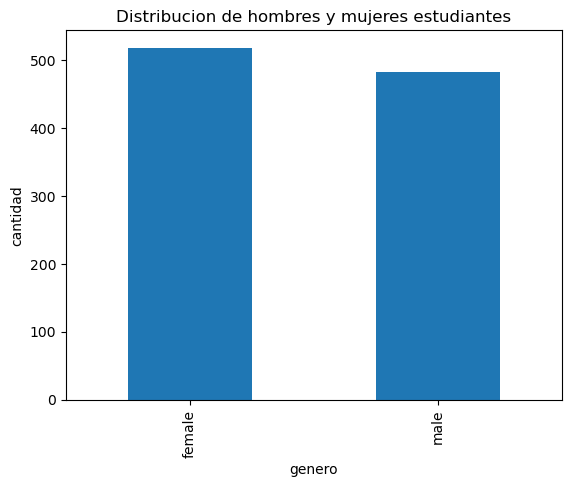

In [494]:
gender_plot = df['gender'].value_counts() \
    .plot(kind = "bar", title = 'Distribucion de hombres y mujeres estudiantes')

gender_plot.set_xlabel('genero')
gender_plot.set_ylabel('cantidad')

plt.show()

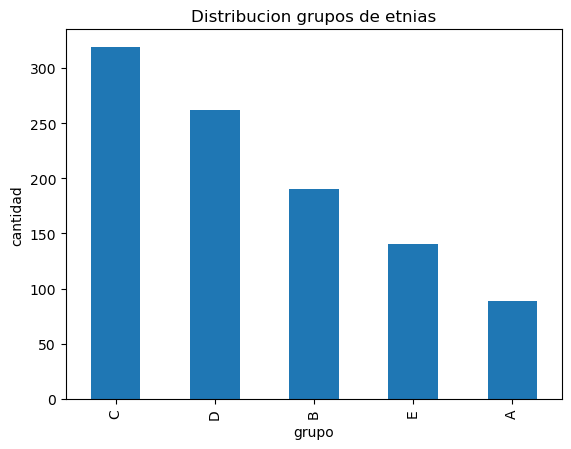

In [495]:
eth_plot = df['ethnicity'].value_counts() \
    .plot(kind = "bar", title = 'Distribucion grupos de etnias')

eth_plot.set_xlabel('grupo')
eth_plot.set_ylabel('cantidad')

plt.show()

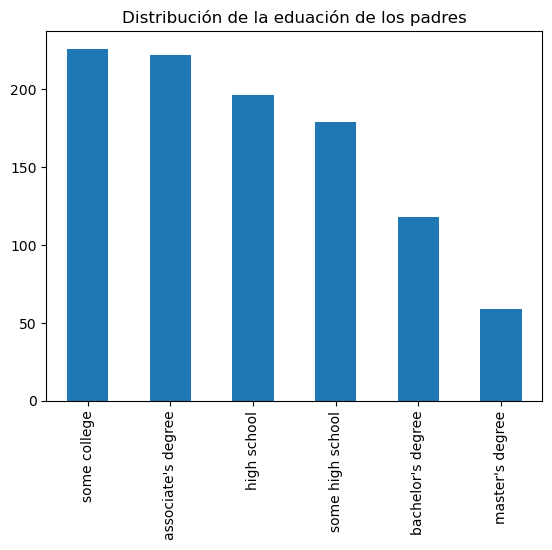

In [496]:
parent_plot = df['parent_education'].value_counts() \
                .plot(kind="bar", title="Distribución de la eduación de los padres")
                

<Axes: xlabel='lunch', ylabel='count'>

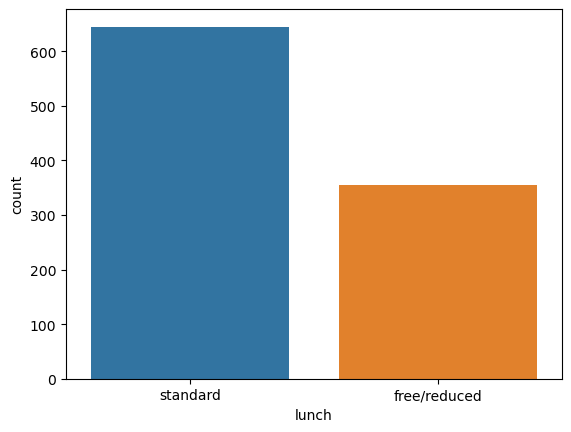

In [497]:
sns.countplot(data=df, x='lunch')

<Axes: xlabel='preparation', ylabel='count'>

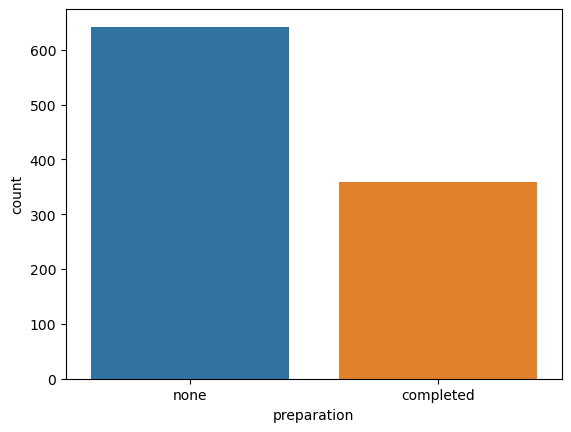

In [498]:
sns.countplot(data=df, x='preparation')

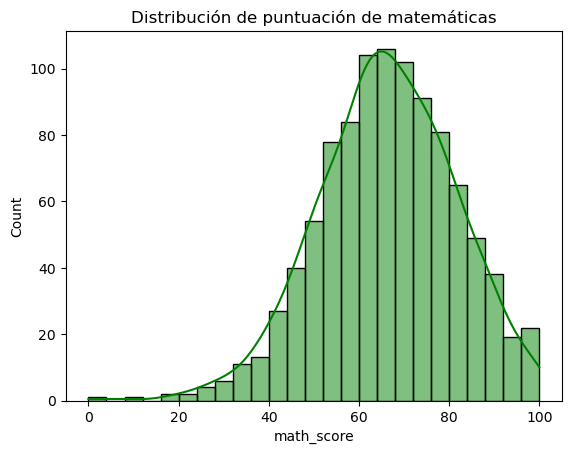

In [499]:
sns.histplot(data=df, x='math_score', color="green", kde=True)
plt.title('Distribución de puntuación de matemáticas')
plt.show()

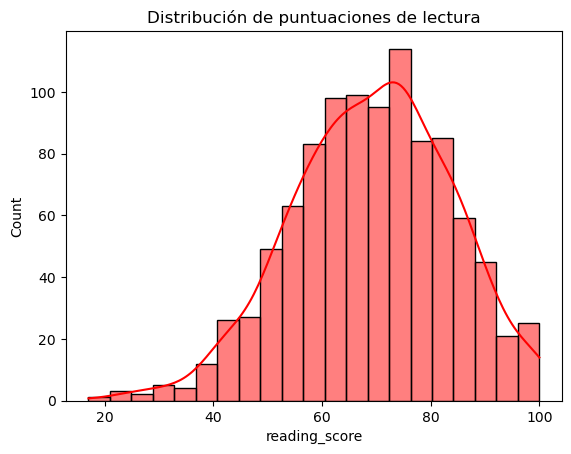

In [500]:
sns.histplot(data=df, x="reading_score", color='red', kde=True)
plt.title('Distribución de puntuaciones de lectura')
plt.show()

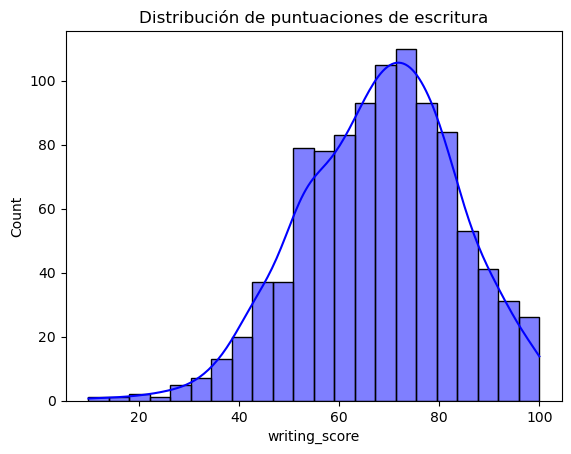

In [501]:
sns.histplot(data=df, x='writing_score', color='blue', kde=True)
plt.title('Distribución de puntuaciones de escritura')
plt.show()

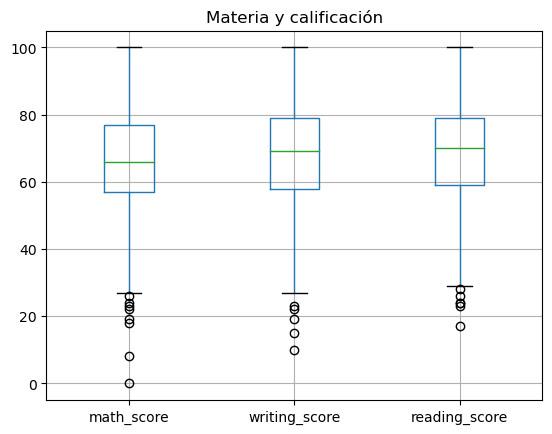

In [502]:
df[['math_score', 'writing_score', 'reading_score']].boxplot()
plt.title('Materia y calificación')
plt.show()

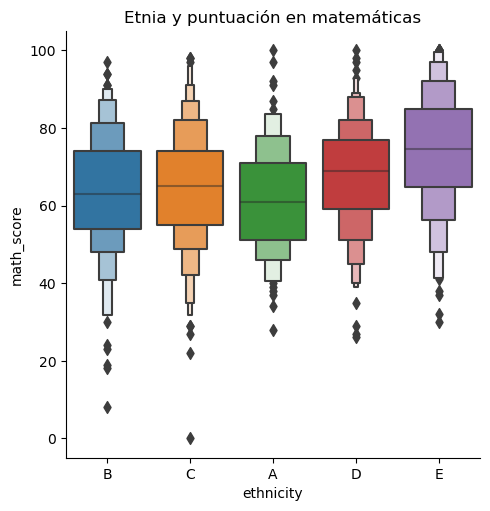

In [503]:
sns.catplot(data=df, x='ethnicity', y='math_score', kind="boxen")
plt.title('Etnia y puntuación en matemáticas')
plt.show()

Se pued notar que la media mas alta de calificaciones la tiene el grupo etnico E

## Análisis multi-variable

### Relación entre variables categóricas y las puntuaciones

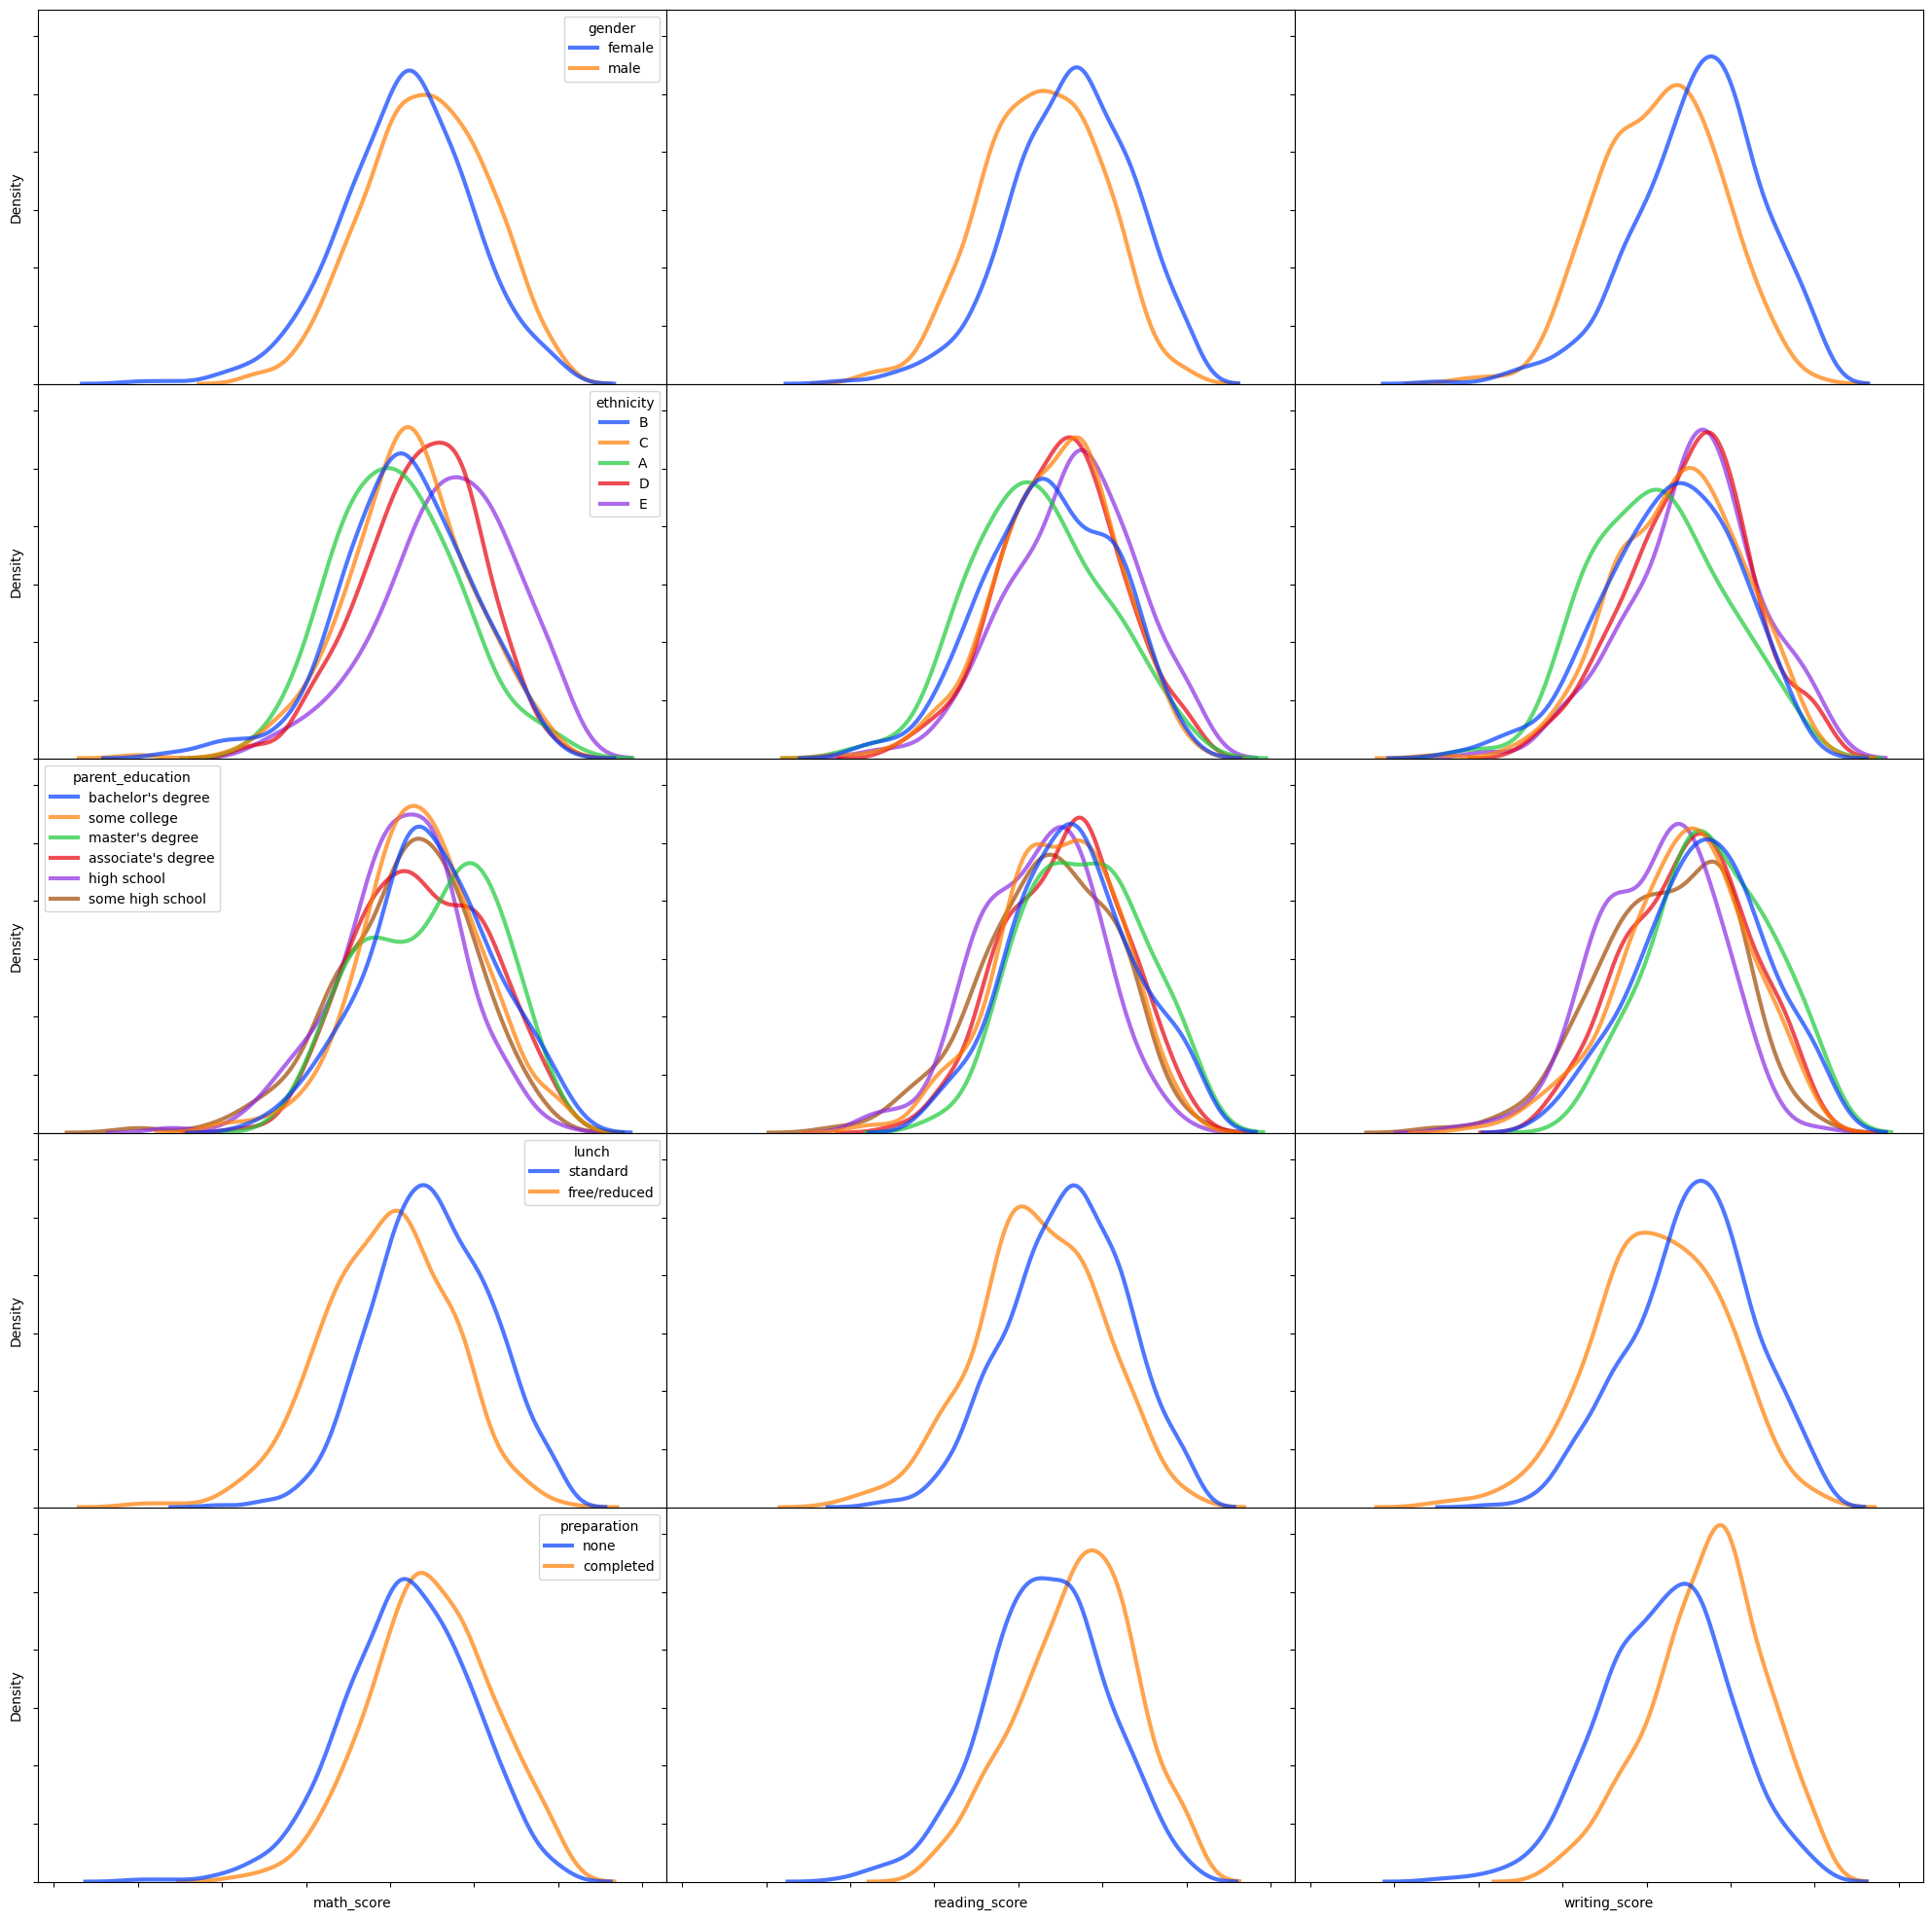

In [504]:
fig, ax = plt.subplots(5, 3, sharey= True, sharex= True, figsize= (25, 25))
for i, cat in enumerate(df.select_dtypes(include= ['object'])):
    for j, score in enumerate(df.select_dtypes(include= ['int64'])):
        sns.kdeplot(
            data= df, x= score, hue= cat,
            fill= False, common_norm= False, palette= 'bright',
            alpha= 0.7, linewidth= 3,
            # multiple= 'fill',
            legend= True if j == 0 else False,
            ax= ax[i, j]
        )
        ax[i, j].set_xticklabels([])
        ax[i, j].set_yticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)

Cosas que se pueden observar

- Las **mujeres** obtienen **mejores** puntuaciones **menos en matemáticas**.
- El **grupo étnico E** obtiene las **mejores** puntuaciones medias , excepto en escritura.
- Los alumnos del **grupo étnico A** es tienen las **calificaciones mas bajas**.
- No parece haber mucha relación entre la educación de los padres y la puntuación obtenida.
- Los alumnos con **lunch standard** tienen **mejor puntuación**.
- Los alumnos con **preparación completada** obtienen **mejor puntuación**.

### Relación entre puntuaciones

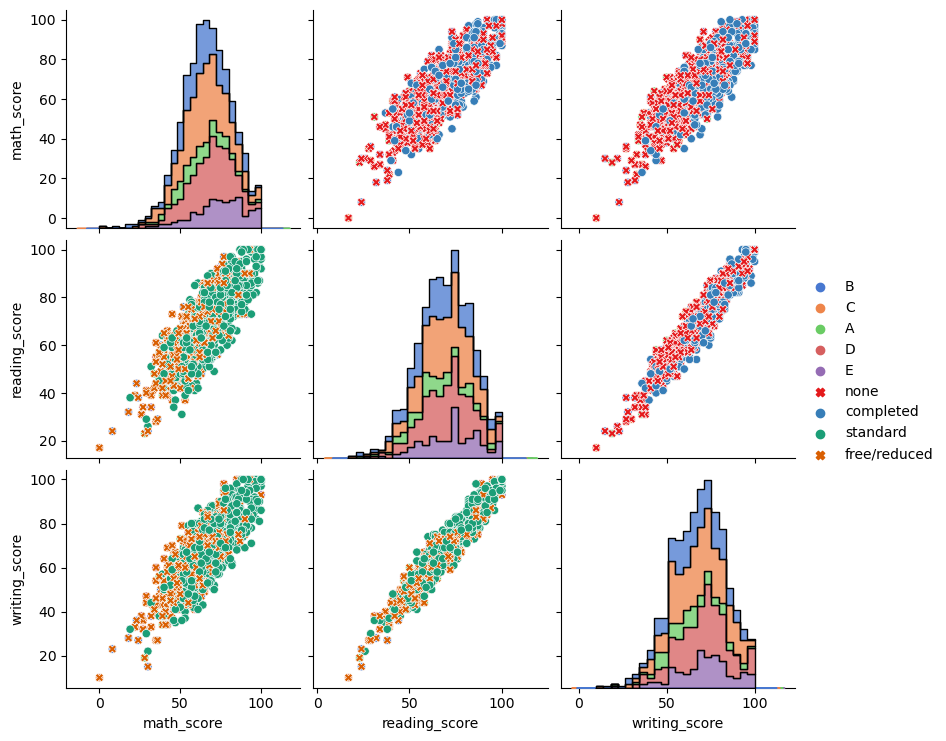

In [505]:
g = sns.pairplot(
    data= df,
    # corner= True,
    hue= 'ethnicity',
    palette= 'muted'
)
g.map_upper(
    sns.scatterplot,
    hue= df.preparation,
    style= df.preparation,
    palette= sns.color_palette("Set1", 2),
    markers = {'completed':'o', 'none':'X'}
)
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_lower(
    sns.scatterplot,
    hue= df.lunch,
    style= df.lunch,
    palette= sns.color_palette("Dark2", 2)
) # markers = {'standard':'o', 'free/reduced':'X'})
g._legend.remove()
g.add_legend(title= '', adjust_subtitles = True)
sns.move_legend(g, 'center right')

Se observa que existe una **correlación lineal** entre las puntuaciones de los distintos examens y que es **mas fuerte** para los rubros de **escritura y lectura**.

También se confirma que los alumnos con **desayuno standard** tienen **mejores calificaciones** y que los alumnos con **peor calificación** tienen desayuno **gratuito/reducido**.

Ademas los alumnos que tiene la **peor calificación** también son los que **no se prepararon**, pero **también** son de los que tienen **mejor calificación**. Los que completaron la preparación tienen calificaciones cercanas a la media.

### Transformando variables categóricas en numéricas

In [506]:
df_num = (
    df
    .assign(
        num_gender = lambda df: df.gender.replace(['male', 'female'], [1, 0])
    )
    .assign(
        num_lunch = lambda df: df.gender.replace(['standard', 'free/reduced'], [1, 0])
    )
    .assign(
        num_preparation = lambda df: df.gender.replace(['completed', 'none'], [1, 0])
    )
    .assign(
        num_parent_education = lambda df: df.parent_education.replace(
            list(df.parent_education.unique()),
            [5, 4, 3, 2, 1 , 0]
        )
    )
    .assign(
        num_ethnicity = lambda df: df.ethnicity.replace(
            list(df.ethnicity.unique()),
            [5, 4, 3, 2, 1]
        )
    )
    .drop(
        df.select_dtypes(include='object'),
        axis= 1
    )
)
df_num.head()

,math_score,reading_score,writing_score,num_gender,num_lunch,num_preparation,num_parent_education,num_ethnicity
0,72,72,74,0,female,female,5,5
1,69,90,88,0,female,female,4,4
2,90,95,93,0,female,female,3,5
3,47,57,44,1,male,male,2,3
4,76,78,75,1,male,male,4,4


### Mapa de correlación de variables

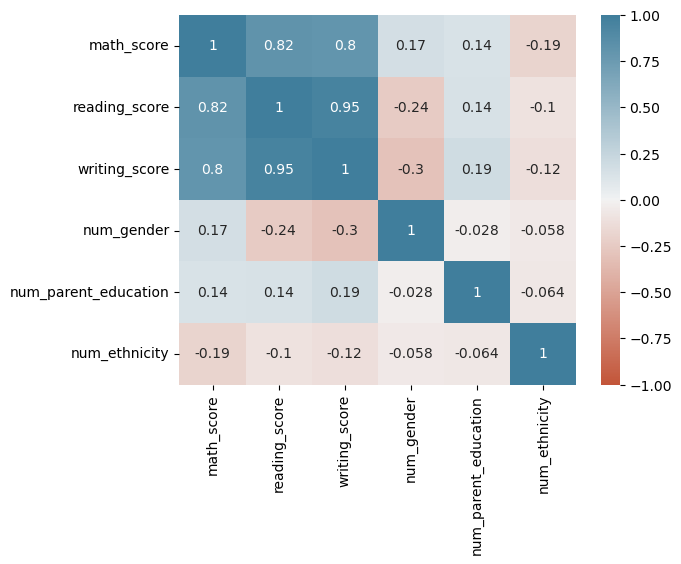

In [507]:
sns.heatmap(
    data= df_num.select_dtypes(exclude= 'object').corr(), annot= True,
    cmap= sns.diverging_palette(20, 230, as_cmap=True),
    center = 0, vmin= -1, vmax= 1
)
plt.show()

Solo las **calificaciones** tienen una **correlación** fuerte entre ellas

# ¿Podría dar una hipótesis que describa las razones del buen o mal rendimiento de los alumnos en las materias de matemáticas, lectura y escritura?

In [ ]:
def pandas_pie(data: pd.DataFrame):
    categories = list(data.select_dtypes(include= 'object'))
    fig, ax = plt.subplots(len(categories), 1, figsize= (20, 30))
    num_rows = data.shape[0]
    for i, cat in enumerate(categories):
        counts = data[cat].value_counts().reset_index()
        labels = list(counts['index'])
        nums = np.array(counts[cat]) / num_rows
        wedges, texts, autotexts = ax[i].pie(nums, labels= labels, autopct='%.0f%%')
        ax[i].legend(wedges, labels,
            title= cat,
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])
    fig.subplots_adjust(wspace=0, hspace=0)

Calculando el promedio de los estudiantes y clasificando la educación de los padres entre universitaria y preparatoria

In [599]:
df_mean = (
    df
    .assign(
        mean = lambda df: (df.math_score + df.reading_score + df.writing_score) / 3
    )
    .assign(
        parent_education = lambda df: df.parent_education.replace(
            list(df.parent_education.unique()),
            ['universidad', 'preparatoria', 'universidad', 'universidad', 'preparatoria', 'preparatoria']
        )
    )
    .sort_values(by= ['mean'], ascending= False)
    .drop(
        list(df.filter(regex= '.*_score').columns),
        axis= 1
    )
)
df_mean.head()


,gender,ethnicity,parent_education,lunch,preparation,mean
916,male,E,universidad,standard,completed,100.000000
458,female,E,universidad,standard,none,100.000000
962,female,E,universidad,standard,none,100.000000
114,female,E,universidad,standard,completed,99.666667
179,female,D,preparatoria,standard,completed,99.000000


## Como son los alumnos con mejores calificaciones?

Seleccionando a los que tienen puntuación mayor a 95

In [603]:
df_mejores = df_mean.loc[df_mean['mean'] > 95]
df_mejores.head()

,gender,ethnicity,parent_education,lunch,preparation,mean
916,male,E,universidad,standard,completed,100.000000
458,female,E,universidad,standard,none,100.000000
962,female,E,universidad,standard,none,100.000000
114,female,E,universidad,standard,completed,99.666667
179,female,D,preparatoria,standard,completed,99.000000


### Visualización de la información

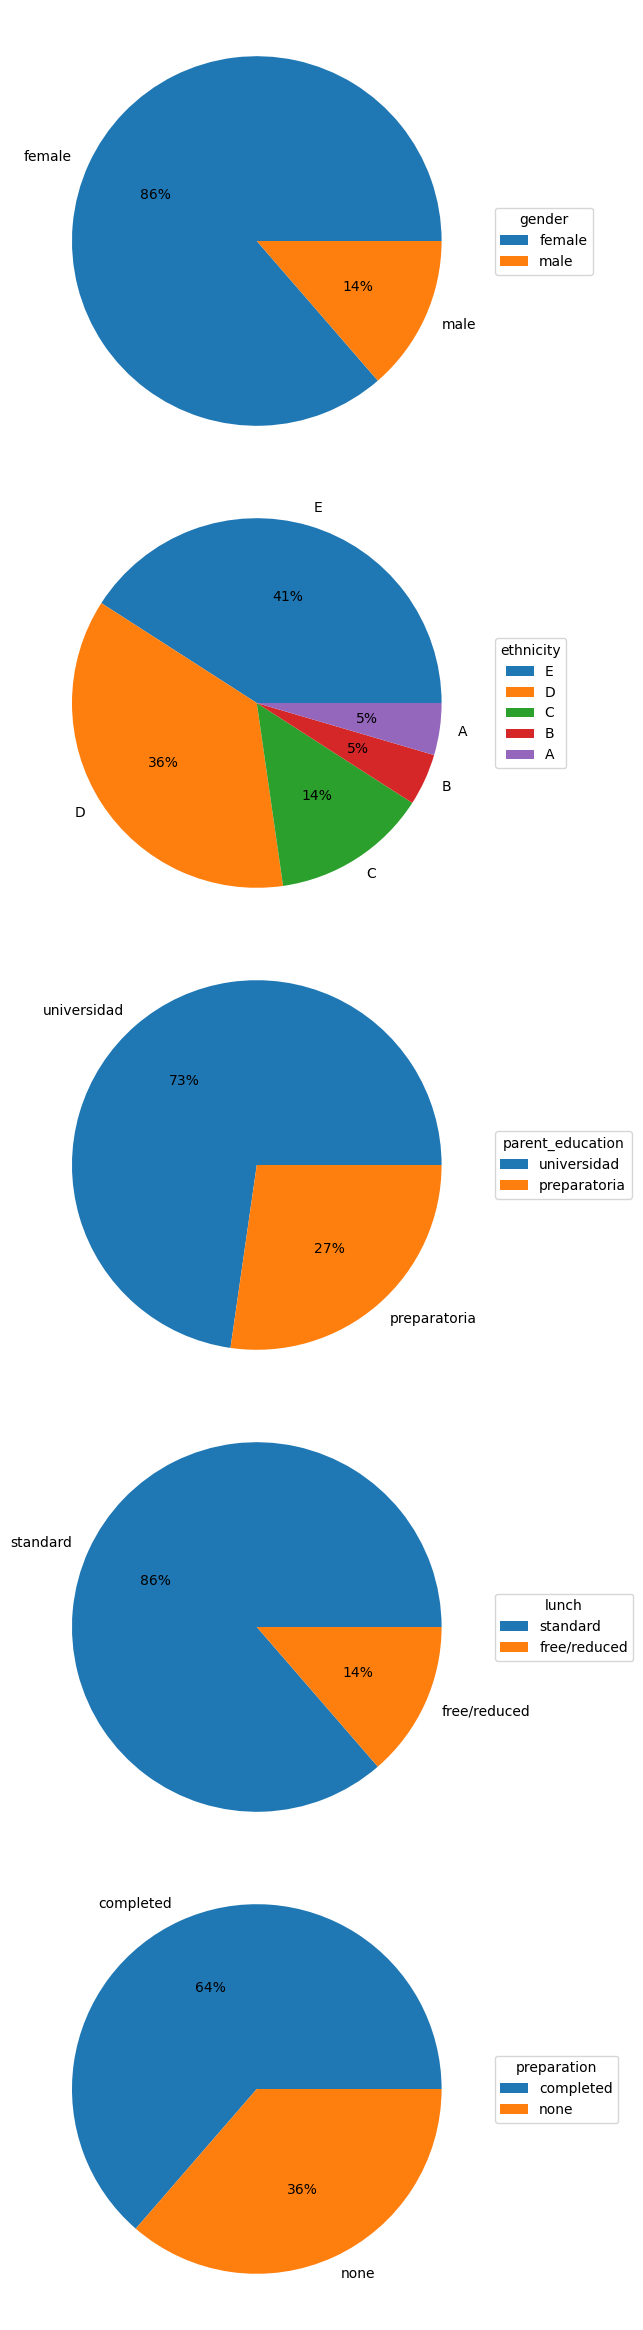

In [604]:
pandas_pie(df_mejores)

## Como son los alumnos con peores calificaciones?

Seleccionando los peores, los alumnos que tienen calificación menor a 40

In [605]:
df_peores = df_mean.sort_values(by= 'mean', ascending= True).loc[df_mean['mean'] < 40]
df_peores.head()

,gender,ethnicity,parent_education,lunch,preparation,mean
59,female,C,preparatoria,free/reduced,none,9.000000
980,female,B,preparatoria,free/reduced,none,18.333333
596,male,B,preparatoria,free/reduced,none,23.000000
327,male,A,preparatoria,free/reduced,none,23.333333
17,female,B,preparatoria,free/reduced,none,26.000000


### Visualización de la información

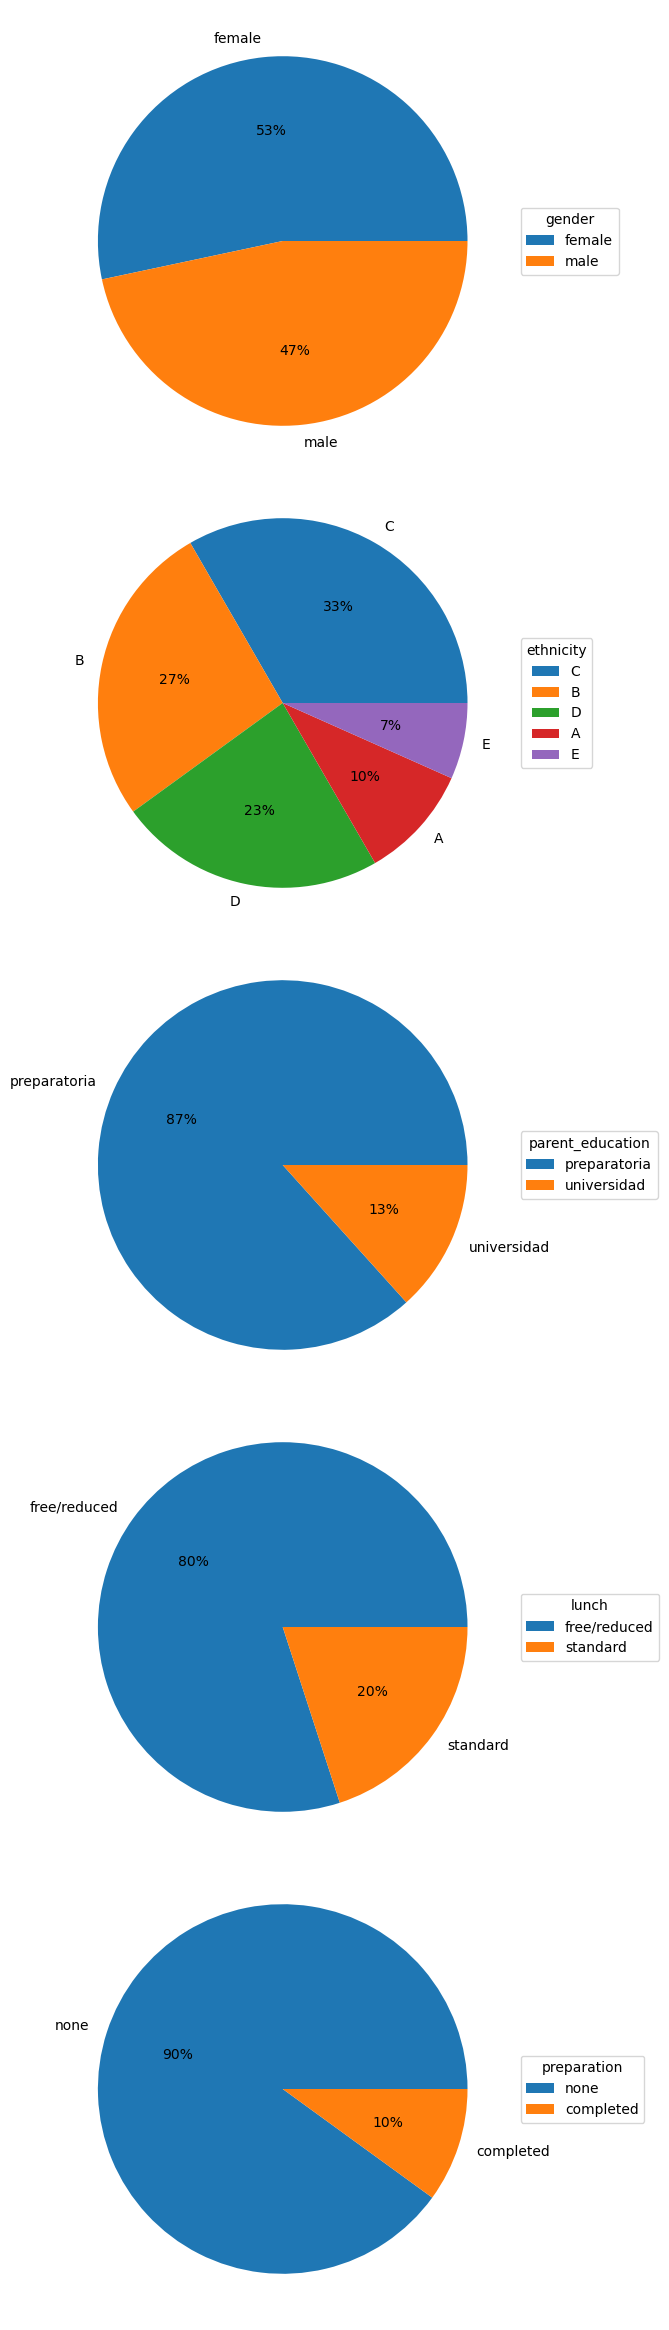

In [606]:
pandas_pie(df_peores)

## Cual es la diferencia entre los mejores y peores alumnos?

Como se pudo ver, se repiten los patrones que anteriormente habíamos identificado, los alumnos con lunch estándar y con preparación completada tienen mejores calificaciones, el grupo étnico E tiende a tener buena calificación.

Cosas nuevas que encontramos son:

- Las personas con **mejor calificación** generalmente son **mujeres**.
- Al dividir los grados educativos de los padres, nos podemos dar cuenta de que los hijos de padres que completaron alguna clase de **educación universitaria** generalmente tienen **mejores resultados** y viceversa.

In [615]:
(
    df_mean
    .groupby(['ethnicity'])
    .mean(['mean'])
    .sort_values(by= 'mean', ascending= False)
)

,mean
ethnicity,
E,72.752381
D,69.179389
C,67.131661
B,65.468421
A,62.992509


## Hipótesis

# Como podemos mejorar el rendimiento de los alumnos en las materias de matemáticas, escritura y lectura?

*(propuestas)*